In [1]:
#This file is for Hierarchical clustering

#The link under is used as inspiration.
#No code is directly copied.
#https://medium.com/@sachinsoni600517/mastering-hierarchical-clustering-from-basic-to-advanced-5e770260bf93


#This section is for datacollection
#The dataset is found here ---->   https://archive.ics.uci.edu/dataset/410/paper+reviews
#The dataset is licensed under a Creative Commons Attribution 4.0 International (CC BY 4.0) license
import json
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statistics

filePath = 'dataset/reviews.json'



decisionCounts = {
    'accept': 0,
    'probably reject': 0,
    'reject': 0,
    'no decision': 0
}


evaluations = []
confidences = []
orientations = []
missingValuesPositions = []
nullValuesCount= 0

# Open the .JSON file 
with open(filePath, 'r', encoding='utf-8') as file:
    data = json.load(file)


for paper in data['paper']:
    print("Paper ID:", paper['id'])
    decision = paper['preliminary_decision'].lower()  
    print("Preliminary Decision:", decision)


    if decision in decisionCounts:
        decisionCounts[decision] += 1
    else:
        
        decisionCounts[decision] = 1

    print("Reviews:")
    for review in paper['review']:
        print("  Review ID:", review['id'])
        print("  Evaluation:", review['evaluation'])
        print("  Confidence:", review['confidence'])
        print("  Date:", review['timespan'])
        print("")
    print()  
    

evaluations = []
confidences = []
orientations = []
decisions = []


decisionMapping = {
    "no decision": 0,  
    "accept": 1,
    "probably reject": 2,
    "reject": 3
}

for paper in data['paper']:
    for review in paper['review']:
        if 'confidence' in review and review['confidence'] is not None:
            confidences.append(int(review['confidence']))


medianConfidence = np.median(confidences)  


evaluations = []
confidences = []
orientations = []
decisions = []

for paper in data['paper']:
    paperDecision = paper['preliminary_decision']
    # Converting the decision, in text, into a numerical code
    
    decisionCode = decisionMapping.get(paperDecision, 0)  

    for review in paper['review']:
        if 'evaluation' in review and review['evaluation'] is not None:
            evaluations.append(int(review['evaluation']))
        else:
            nullValuesCount += 1

        if 'confidence' in review and review['confidence'] is not None:
            confidences.append(int(review['confidence']))
        else:
            nullValuesCount += 1
            confidences.append(int(medianConfidence))  

        if 'orientation' in review and review['orientation'] is not None:
            orientations.append(int(review['orientation']))
        else:
            nullValuesCount += 1
        

        decisions.append(decisionCode)

for paper in data['paper']:
    for review in paper['review']:
        if 'decision' in review:
            
            decisionClass = review['decision']
        else:
            decisionClass = 0  

       # decisions.append(decisionClass)

print(f"There are combined {nullValuesCount} null values for orientation, confidence and evaluation.")



print(f"The length of 'confidences' is {len(confidences)}")
print(f"The length of 'evaluations' is {len(evaluations)}")
print(int(medianConfidence))


Paper ID: 1
Preliminary Decision: accept
Reviews:
  Review ID: 1
  Evaluation: 1
  Confidence: 4
  Date: 2010-07-05

  Review ID: 2
  Evaluation: 1
  Confidence: 4
  Date: 2010-07-05

  Review ID: 3
  Evaluation: 1
  Confidence: 5
  Date: 2010-07-05


Paper ID: 2
Preliminary Decision: accept
Reviews:
  Review ID: 1
  Evaluation: 2
  Confidence: 4
  Date: 2010-07-05

  Review ID: 2
  Evaluation: 2
  Confidence: 4
  Date: 2010-07-05

  Review ID: 3
  Evaluation: 2
  Confidence: 4
  Date: 2010-07-05


Paper ID: 3
Preliminary Decision: accept
Reviews:
  Review ID: 1
  Evaluation: 2
  Confidence: 4
  Date: 2010-07-05

  Review ID: 2
  Evaluation: 2
  Confidence: 3
  Date: 2010-07-05

  Review ID: 3
  Evaluation: 0
  Confidence: 3
  Date: 2010-07-05


Paper ID: 4
Preliminary Decision: accept
Reviews:
  Review ID: 1
  Evaluation: 2
  Confidence: 4
  Date: 2010-07-05

  Review ID: 2
  Evaluation: -2
  Confidence: 2
  Date: 2010-07-05


Paper ID: 5
Preliminary Decision: accept
Reviews:
  Review

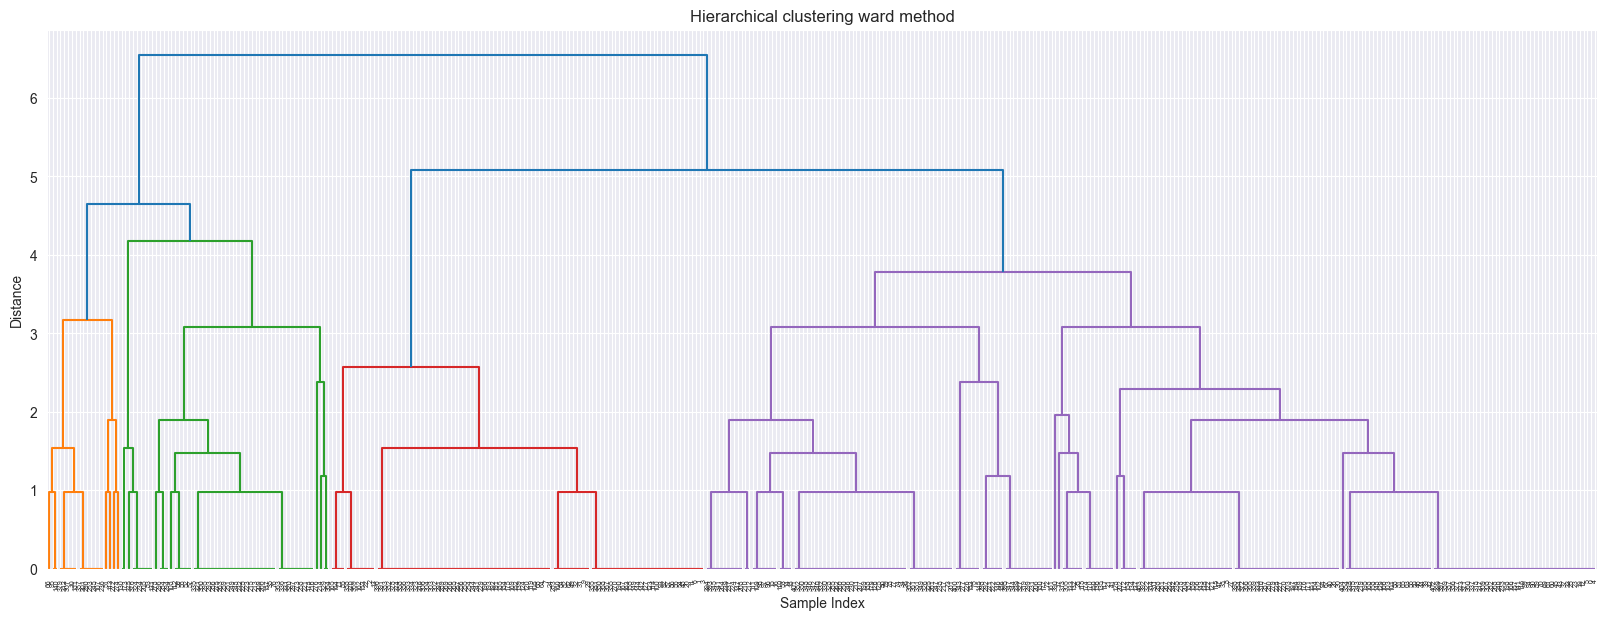

The average silhouette is : 0.4034845260674851
Cophenetic correlation coefficient: 0.6200636727541736


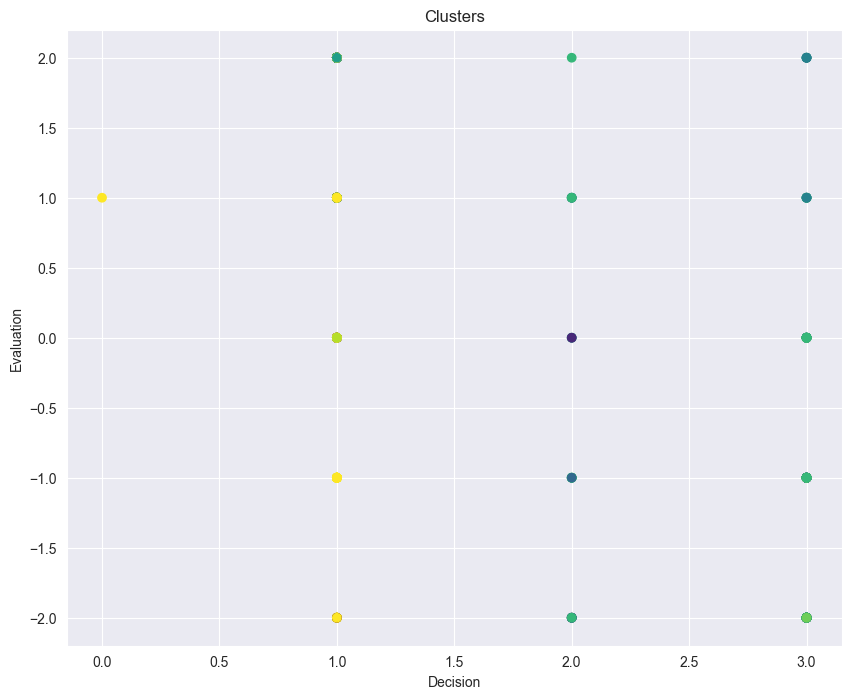

In [2]:
#Hierarchical clustering under:

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, cophenet
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import pdist


df = pd.DataFrame({
    'Evaluation': evaluations,
    'Confidence': confidences,
    'Orientation': orientations,
    'Decision': decisions
})

X = df[['Confidence', 'Orientation', 'Decision']]

scaler = StandardScaler()
xScaled = scaler.fit_transform(X)

linked = linkage(xScaled, method='complete')

# Dendrogram
plt.figure(figsize=(20, 7))
dendrogram(linked,
           orientation='top',
           labels=np.array(df.index),
           distance_sort='ward',
           show_leaf_counts=True)
plt.title('Hierarchical clustering ward method')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

#This section is for testing the performance of the Ward method



clustLables = fcluster(linked, 3, criterion='distance')


silhouetteAvg = silhouette_score(xScaled, clustLables)
print("The average silhouette is :", silhouetteAvg)


cophenetCorr, _ = cophenet(linked, pdist(xScaled))
print("Cophenetic correlation coefficient:", cophenetCorr)


clustLables = fcluster(linked, 3, criterion='distance')


plt.figure(figsize=(10, 8))
plt.scatter(df['Decision'], df['Evaluation'], c=clustLables, cmap='viridis') 
plt.xlabel("Decision")
plt.ylabel("Evaluation")
plt.title("Clusters")
plt.show()

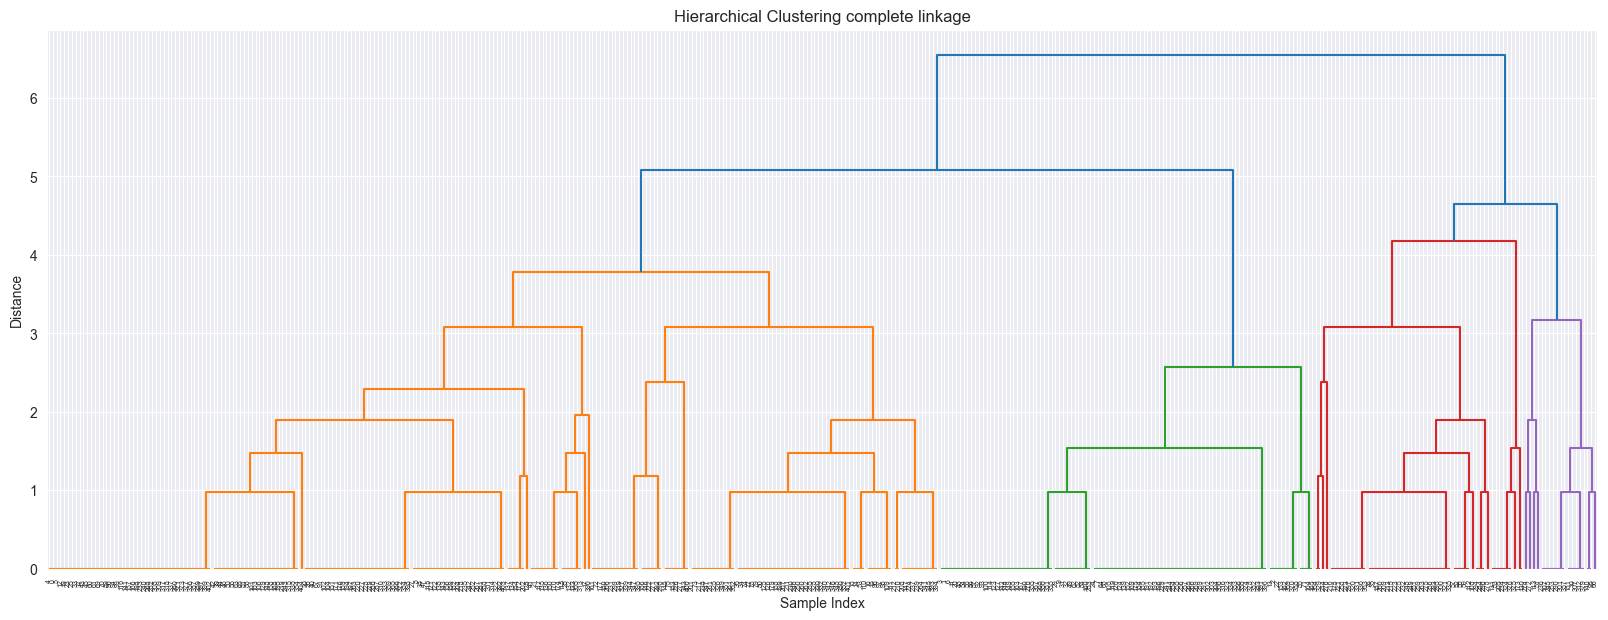

Cophenetic correlation coefficient: 0.6200636727541736
The average silhouette_score is : 0.4034845260674851


In [3]:
#This is for using the complete linkage method
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import fcluster, cophenet
from scipy.spatial.distance import pdist
linkedForComplete = linkage(xScaled, method='complete')


plt.figure(figsize=(20, 7))
dendrogram(linkedForComplete,
           orientation='top',
           labels=np.array(df.index),
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Hierarchical Clustering complete linkage')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

clusterLabel = fcluster(linkedForComplete, 3, criterion='distance')

cophenetCorr, _ = cophenet(linkedForComplete, pdist(xScaled))
print("Cophenetic correlation coefficient:", cophenetCorr)


silhouetteAvg = silhouette_score(xScaled, clusterLabel)
print("The average silhouette_score is :", silhouetteAvg)

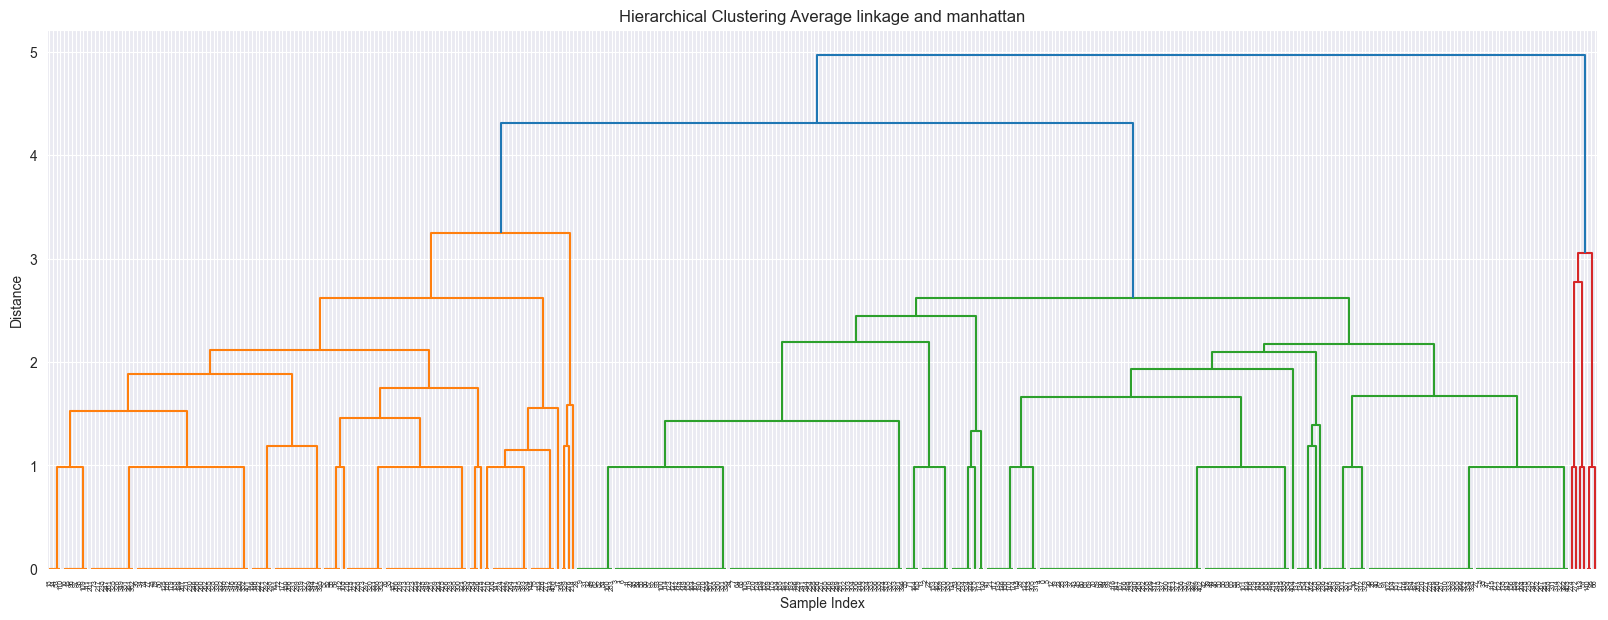

Cophenetic correlation coefficient: 0.7581729849755733
The average for the linked manhattan is : 0.327349416225461


In [4]:
# This is for using the average linkage method with manhattan distance
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import fcluster, cophenet
from scipy.spatial.distance import pdist
linkedAverg = linkage(xScaled, method='average', metric='cityblock')


plt.figure(figsize=(20, 7))
dendrogram(linkedAverg,
           orientation='top',
           labels=np.array(df.index),
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Hierarchical Clustering Average linkage and manhattan')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

clusterLabelManhattan = fcluster(linkedAverg, 3, criterion='distance')

silhouetteAvg = silhouette_score(xScaled, clusterLabelManhattan)

cophenetCorr, _ = cophenet(linkedAverg, pdist(xScaled))
print("Cophenetic correlation coefficient:", cophenetCorr)


print("The average for the linked manhattan is :", silhouetteAvg)